# FINAL YEAR PROJECT
Done by : 
- P1935785 Ang Yak Hng
- P1932964 Teo Swee Hong Winson
- P1935727 Ng Zhan Kang
- P1935488 Triston Loh
- P1935602 Ng Ao Yang

Class of DIT/FT/3A/05


---
---

# 1.Cloning Github To Colab Workspace

<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> The entire section 1 is dedicated to users who are using google colab to do the entire project. This entire process clones the private repository directly into the temporary google colab workspace. Google colab user are to repeat this same proccess whenever in a new session. Users who do not use colab to do this project CAN OMIT THE ENTIRE SECTION 1. 
</div>

### 1.1. Configurating SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:ZspmrdJA7vPoERsLNONcIRZV/ukm3jsqxAm3hBpJy1M root@ca7698c4e106
The key's randomart image is:
+---[RSA 4096]----+
|  +oo..          |
| o E o           |
|o.*.. .          |
|oBo++  . .       |
| o=Boo  S        |
|.  .B* *         |
|   o+o* +        |
|    =*.=.        |
|   .o==.oo       |
+----[SHA256]-----+


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> When prompted for a set of informations such as "Enter a file in which to save the key...", please press enter and DO NOT type in anything.
</div>

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-3fa83667


In [ ]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQC1wuqf4+DWiaDu1GYypdqhrv8ilPqdHvYGvPB+BpCy+YGOWu8EezJylrkbg4yyL9kGqkGKBIcH0QITzSSBYH7tuDGtV584bK9ZHuxeowJbkMFp5lgq06yVT47wGvcgOS7aOoX/eV3TbxC5RxKCNlvLjxYWFtyK26gGk83/gnBk9h/rHCqmNT28rbm5+3Q9HxzM4QQkdpU4/qBmI4dji8vyGNHGLY74z9hbyCh654nHcPuhK42GYTowmfOv9JP5ru/zGy6u28bO6GaHc7wMtgIi691LCiC76FulemTMfomAiW42zhNdi/abxouqYAXb1vu9OmoAU9AyayL0hlpEO1VhQ6WOfbSwQSAB2Jm+3Y3ZIhZvBxR1/tqXno3PBfTWnWN/W5w+wAGmeYYyU4ZOHDef9pr/Vv4ODe3dlR1kbSqVKMzXJDipkOsuS8HrOIAbfK3vkRaCkpRK23Y3mUmeOLXyDGOihbZ11mXToaoFfAyEJYCReyYxg8tSaq5Yu4Lr5++U52/GQLicYV06dmGcmJY4ZWiOvnm8eB+ZBksobFgtJdWAK5qFWrIdpYtNaekawGQAJ/5JWgfsg6mN3/kvmPNbLo6tHRbrFPTpkyJbunPJNiJOfA9RyvF0z5OqichAbU2asVmo7PnQGFRoCMMOjL7v0DH9OrKQaCcxwKea5kIMpw== root@ca7698c4e106


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> After the key has been generated, please copy the entire key. Navigate to your Github Account > Profile Picture > Settings > SSH and GPG keys > New SSH Keys. Paste the generated key into the blank and lable it for your own convenience.
</div>

### 1.2. Testing SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh -T git@github.com

Hi ngzhankang! You've successfully authenticated, but GitHub does not provide shell access.


### 1.3. Clone Private Repository

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!git clone git@github.com:ngzhankang/finalYearProjectUOB.git

Cloning into 'finalYearProjectUOB'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 145 (delta 46), reused 58 (delta 16), pack-reused 0
Receiving objects: 100% (145/145), 96.56 MiB | 9.40 MiB/s, done.
Resolving deltas: 100% (46/46), done.


---
---

# 2.Data Importing

### 2.1. Load the libraries

---

Load the necessary libraries for usage in the entire project.

In [1]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


### 2.2. Check CUDA Version

---

We need to check the cuda version to download the correct version of spaCy for this application.

In [2]:
# suppress future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# install necessary libraries that might not be found
!pip install tensorflow_addons
!pip install -U spacy
!python -m spacy validate
!pip install -U pip setuptools wheel
!pip install -U spacy[cuda110,transformers,lookups]
!python -m spacy download en_core_web_lg
!pip install --upgrade gensim
!pip install nltk

# check versions of libraries we are going to use
%tensorflow_version 2.x
import os
import tensorflow
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import spacy
import nltk
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Tensorflow version={}".format(tensorflow.__version__))
print("Keras version={}".format(tensorflow.keras.__version__))
print("Sklearn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("SpaCy version={}".format(spacy.__version__))
print("nltk version={}".format(nltk.__version__))
print("Python version={}".format(platform.python_version()))

     |████████████████████████████████| 679 kB 6.7 MB/s 
     |████████████████████████████████| 6.4 MB 7.4 MB/s 
     |████████████████████████████████| 10.1 MB 63.9 MB/s 
     |████████████████████████████████| 456 kB 64.3 MB/s 
     |████████████████████████████████| 621 kB 56.5 MB/s 
     |████████████████████████████████| 42 kB 2.0 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
2021-07-30 17:02:19.692140: I tensorflow/stream

distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 169.2 MB 24 kB/s 
     |████████████████████████████████| 97.3 MB 104 kB/s 
     |████████████████████████████████| 2.2 MB 61.4 MB/s 
     |████████████████████████████████| 998 kB 63.3 MB/s 
     |████████████████████████████████| 3.3 MB 50.1 MB/s 
     |████████████████████████████████| 895 kB 52.0 MB/s 
  distutils: /usr/local/include/python3.7/tokenizers
  sysconfig: /usr/include/python3.7m/tokenizers
  distutils: /usr/local/include/python3.7/sacremoses
  sysconfig: /usr/include/python3.7m/sacremoses
  distutils: /usr/local/include/pyth

### 2.3. Load the modules

---

Load the necessary modules for usage in the entire project.

In [4]:
# importing necessary modules for this project
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import spacy
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
nltk.download('punkt')

# activate the GPU to run spaCy with GPU
spacy.prefer_gpu()

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### 2.4. Load the dataset

---

Load the dataset for usage in the entire project.

In [5]:
# use pandas to read the excel file and populate it in a pandas dataframe
companies = pd.read_excel('./clean_dataset.xlsx')

# see the top 10 companies that are populated in the dataframe
companies.head(10)

,Company_ID,Company,Country,PIC,Sector,Subsector,Archetype,Valuechain,Websites,Company Profile Information,Remarks
0,4137190062363536,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,NaN,TMT,media,media_aggregator/distributor,Midstream,https://getlinks.co/6831,For over 80 years of experience in creating an...,NaN
1,23248790229909752,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://baike.baidu.com/item/%E4%B8%9C%E8%8E%9...,Yatai's main products cover various cleaning m...,NaN
2,28486505934571008,EXIS TECH SDN. BHD.,MALAYSIA,NaN,oos,others,others,NaN,http://www.exis-tech.com/,"In the beginning, it started off by providing ...",NaN
3,38251695094669872,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39910921263510784,Aztech Electronics Pte Ltd,SINGAPORE,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://www.aztech.com/business/about-us/,"Being a turnkey, one-stop integrated solutions...",NaN
5,54863889264716592,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,NaN,tmt,it_services,it_services,midstream,https://www.tongdun.net/info/company,Tongdun Technology is a professional third-par...,NaN
6,60624700618157752,EMASTIGA ENGRG PTE LTD,SINGAPORE,NaN,cni,cni_service providers,cni_service providers,midstream,http://emastiga.com/,"For over 30 years, EMASTIGA has been servicing...",Holding company and also provides it_services....
7,102285011598298000,"AEROFLUID CO.,LTD.",THAILAND,NaN,CNI,cni_equipment suppliers,cni_equipment suppliers,MIDSTREAM,https://www.matchlink.asia/business/page/Thail...,Sales of hydraulic equipment and parts,NaN
8,120313950904532608,EXCELKOS SDN. BHD.,MALAYSIA,NaN,IND,diversified,rubber,Manufacturer,https://www.excelkos.com/,"For Excelkos, it all started with a far-sighte...",NaN
9,125319506467804896,KUM ENG HUAT ELECTRIC CO PTE LTD,SINGAPORE,NaN,tmt,consumer electronics,consumer electronics_distributor,downstream,https://kumenghuat.com.sg/pages/about,Kum Eng Huat is the authorised dealer for Osra...,NaN


---
---

# 3.Exploratory Data Analysis

### 3.1. Get overview of dataset

---

Get statistical information of the dataset to understand the dataset better.

In [6]:
# see the row headers of the entire pandas dataframe
list(companies.columns)

['Company_ID',
 'Company',
 'Country',
 'PIC',
 'Sector',
 'Subsector',
 'Archetype',
 'Valuechain',
 'Websites',
 'Company Profile Information',
 'Remarks']

In [7]:
# get the total number of records in the dataframe
df_count = companies['Company_ID'].count()

# get count of unique contries where companies are based in
df_countCountry = companies['Country'].nunique()

# get count of total unique sectors where companies are from
df_countSector = companies['Sector'].nunique()

# get count of total unique subseector where companies are from
df_countsubSector = companies['Subsector'].nunique()

# get count of total unique valuechain where companies are from
df_countValuechain = companies['Valuechain'].nunique()

print('Total number of records:', df_count)
print('Total number of countries:', df_countCountry)
print('Total number of sectors:', df_countSector)
print('Total number of subsectors:', df_countsubSector)
print('Total number of valuechain:', df_countValuechain)

Total number of records: 9600
Total number of countries: 14
Total number of sectors: 16
Total number of subsectors: 37
Total number of valuechain: 18


In [8]:
# get total number of countries
df_totalCountries = companies['Country'].value_counts()

# get list of unique sector
df_sector = companies['Sector'].value_counts()

# get list of unique archetype
df_archetype = companies['Archetype'].value_counts()

# get list of unique valuechain
df_valuechain = companies['Valuechain'].value_counts()

print('List of unique countries:\n{}'.format(df_totalCountries))
print()
print('List of unique sector:\n{}'.format(df_sector))
print()
print('List of unique valuechain:\n{}'.format(df_valuechain))

List of unique countries:
SINGAPORE          3459
MALAYSIA           2200
THAILAND           1817
CHINA               971
HONG KONG           577
INDONESIA           552
VIETNAM              12
MYANMAR               3
AUSTRALIA             2
LABUAN                2
TAIWAN                2
UNITED KINGDOM        1
INDONESIANO CIF       1
CANADA                1
Name: Country, dtype: int64

List of unique sector:
OOS           2082
CNI           1744
REH            942
IND            886
CG             862
ONG            667
TMT            637
cni            258
tmt            188
oos             79
ong             66
ind             11
cg               7
reh              6
                 1
auto & mec       1
Name: Sector, dtype: int64

List of unique valuechain:
MIDSTREAM                 1696
Downstream                1221
Midstream                  702
                           659
DOWNSTREAM                 658
midstream                  309
Manufacturer               296
UPSTREAM  

In [9]:
# get list of unique subsector
df_subsector = companies['Subsector'].value_counts()

print('List of unique Subsector:\n{}'.format(df_subsector))

List of unique Subsector:
others                               2161
building_material                     831
retail n distribution                 560
buildings & industrial                542
auto & mec                            482
petrochemical                         421
consumer electronics                  337
metals and mining                     300
residential                           281
cni_service providers                 279
restaurants, catering & services      270
fmcg                                  186
utilities                             178
it_services                           171
commercial                            146
o&g                                   135
mixed                                 129
o&g_service providers/contractors     123
semiconductor                         117
diversified                           114
infrastructure                        107
telecommunication                      88
hotels and accommodation               88
animal p

In [10]:
# get list of unique archetype
print('List of unique archetype:\n{}'.format(df_archetype))

List of unique archetype:
others                                2161
building_material_manufacturer         573
buildings & industrial_contractor      496
consumer discretionary distributor     358
cni_service providers                  279
                                      ... 
MIDSTREAM                                2
tisp – tower                             2
tisp – fiber cable                       2
building material_manufacturer           1
metals and mining                        1
Name: Archetype, Length: 94, dtype: int64


### 3.2. Drop unncessary columns

---

Here, we will drop columns that wiill not aid in our EDA.

In [11]:
# declare the list of the row names that are redundant
rows_to_drop = ['Company_ID', 'PIC', 'Websites', 'Remarks']

# use a conditional expression to filter out those rows
df_filteredCompanies = companies.drop(labels=rows_to_drop, axis=1)

df_filteredCompanies

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
...,...,...,...,...,...,...,...
9595,SOONBEE INVESTMENT HOLDINGS PTE. LT D,SINGAPORE,OOS,others,others,NaN,SOONBEE INVESTMENT HOLDINGS is an ACRA-registe...
9596,SICHUAN CHINA RAILWAY WENRUI REAL E,CHINA,NaN,NaN,NaN,NaN,NaN
9597,GROUP INDUSTRIES PTE LTD,SINGAPORE,CNI,building_material,building_material_manufacturer,MIDSTREAM,Group Industries Pte Ltd was founded in 1986. ...
9598,"SIAM NISSAN EASTERN CO.,LTD.",THAILAND,IND,auto & mec,auto dealer,Trader,Auto Dealership - Retail


### 3.3. Filter rows with valid data

---

Extract columns with Nan values and list them out here. Afterwards, gather the rows deemed suitable to process NLP.

In [12]:
# find all the rows with nan data in sector, subsector, archetype and valuechain
cols_to_check = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']
empty = df_filteredCompanies[df_filteredCompanies[cols_to_check].isnull().all(1)]

empty

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
12,"CHANGTU COUNTRY LONGXING FERTILIZER CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
28,"ZIBOBOSHANHONGLIWEI MOTOR CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
48,"BEIJING DUO MEIDUO SHIYOU PRODUCTS SALES CO., ...",CHINA,NaN,NaN,NaN,NaN,NaN
63,TRUSVEST SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9576,REAL CHARM INVESTMENT LIMITED,HONG KONG,NaN,NaN,NaN,NaN,NaN
9585,JIJIN INTERNATIONAL TRADE (SHANGHAI),CHINA,NaN,NaN,NaN,NaN,NaN
9592,"QITAI TIANSHAN CEMENT CO., LTD",CHINA,NaN,NaN,NaN,NaN,NaN
9596,SICHUAN CHINA RAILWAY WENRUI REAL E,CHINA,NaN,NaN,NaN,NaN,NaN


In [13]:
# now we get the dataset that is valid
df_valid = pd.concat([df_filteredCompanies, empty, empty]).drop_duplicates(keep=False)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,Tongdun Technology is a professional third-par...
...,...,...,...,...,...,...,...
9593,BANGKOK PATANA SCHOOL,THAILAND,CG,retail n distribution,consumer discretionary distributor,Downstream,Bangkok Patana School is Thailand’s original B...
9594,INDRATI LINES PTE LTD,SINGAPORE,OOS,others,others,NaN,Indra is one of the leading global technology ...
9595,SOONBEE INVESTMENT HOLDINGS PTE. LT D,SINGAPORE,OOS,others,others,NaN,SOONBEE INVESTMENT HOLDINGS is an ACRA-registe...
9597,GROUP INDUSTRIES PTE LTD,SINGAPORE,CNI,building_material,building_material_manufacturer,MIDSTREAM,Group Industries Pte Ltd was founded in 1986. ...


In [14]:
# take a look at the number of records after filtering
df_filterCount = df_valid['Company'].count()

print('Total number of filtered records:', df_filterCount)

Total number of filtered records: 8447


### 3.4. Get graphical overview of dataset

---

Get visualised information of the dataset to understand the dataset better.

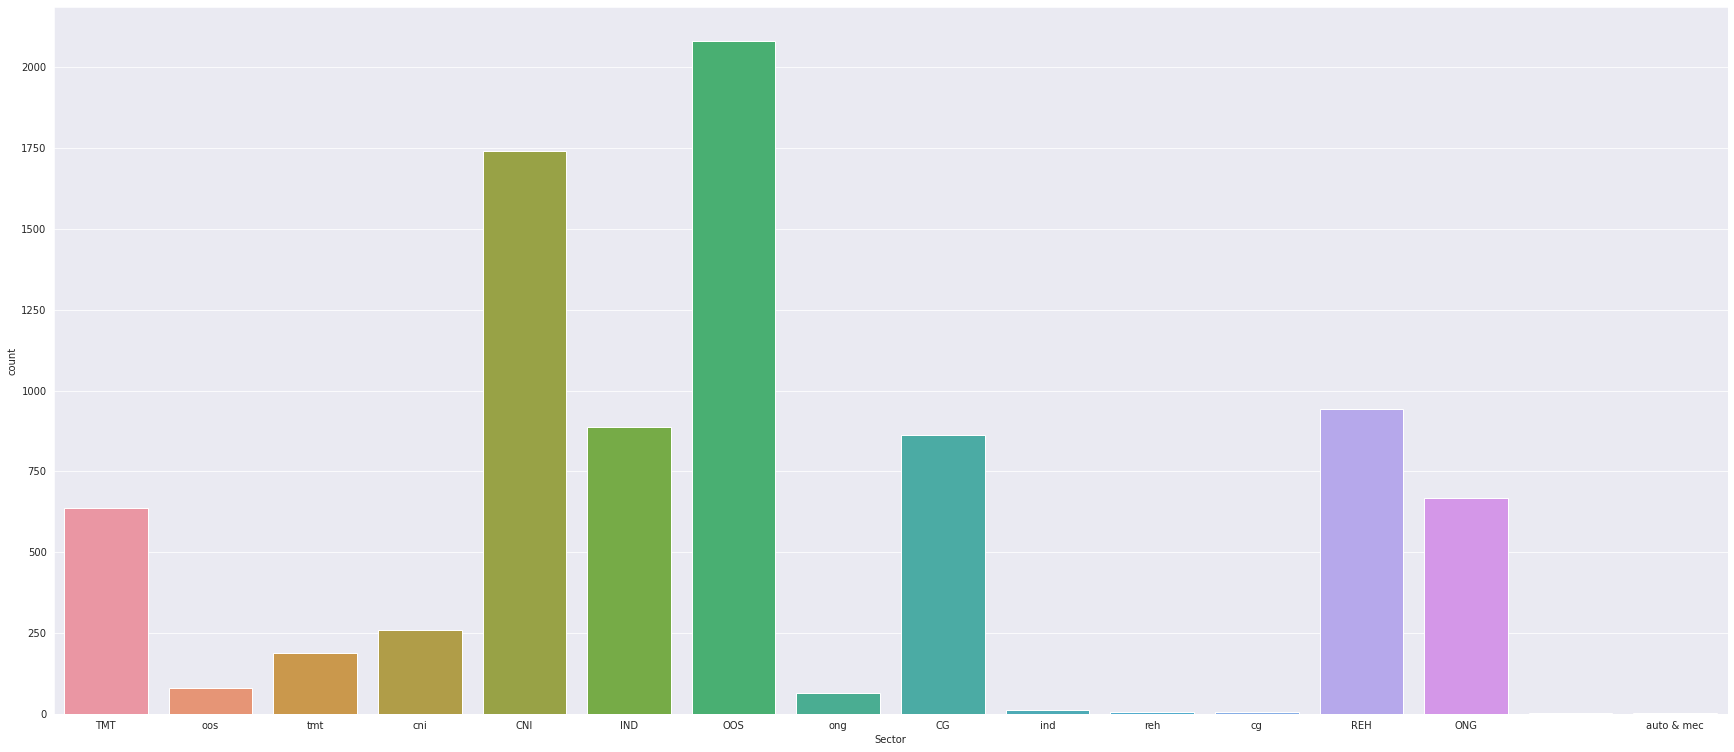

In [15]:
sns.set_style('darkgrid')
plt_dims = (30, 13)
fig, ax = plt.subplots(figsize=plt_dims)

# plot a barplot to see number of companies that belongs to specific sectors
sns.countplot(x="Sector", data=df_valid, ax=ax)
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies comes from the CNI(Construction And Infrastructure), with TMT(Technology, Media and Telecomm) sector.
</div>

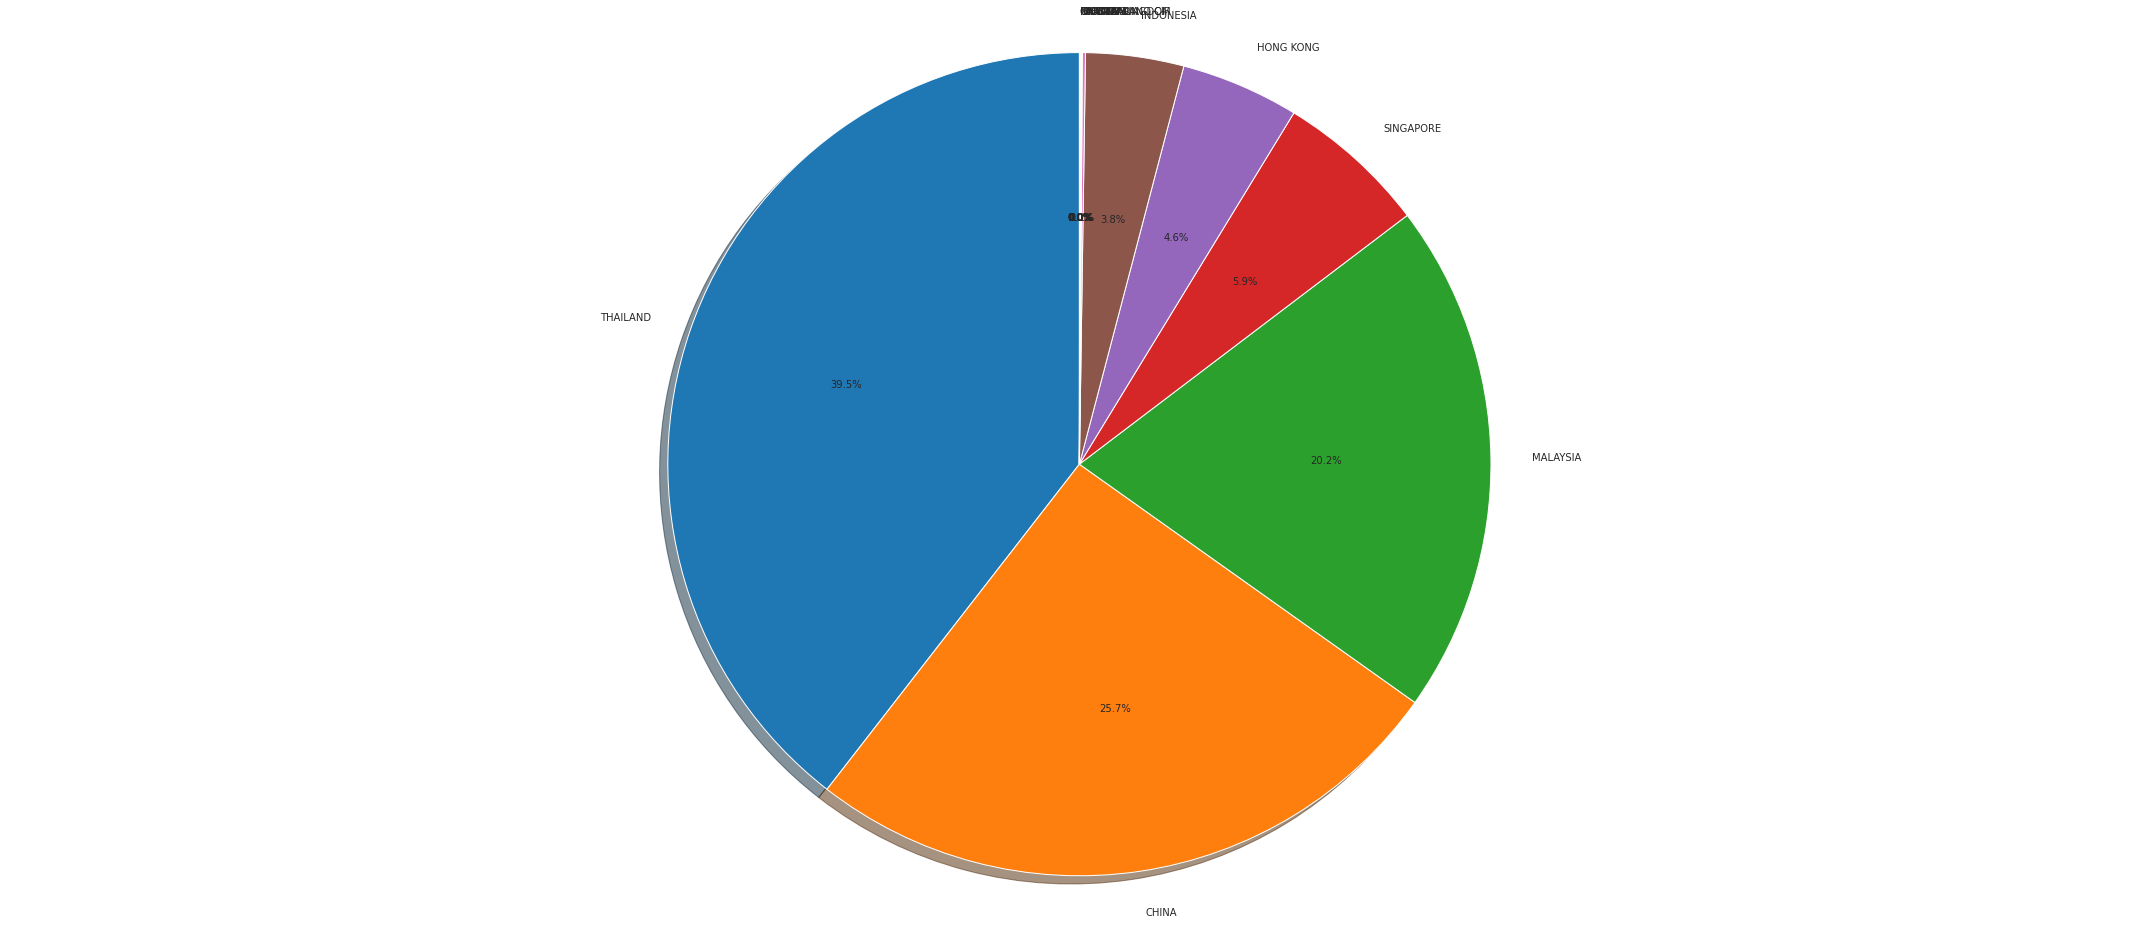

In [16]:
# pie chart
labels = list(df_valid['Country'].unique())
sizes = list(df_valid['Country'].value_counts())

plt_dims = (30, 13)
fig1, ax1 = plt.subplots(figsize=plt_dims)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies are Singapre-Based companies, followed up by Hong Kong, Indonesia and so on.
</div>

### 3.5. See examples of company description

---

We would now like to see some examples of the company descriptions in order to undestand later how to preprocess them later on.

In [17]:
# configurate pandas dataframe to let us see the entire company description
pd.set_option('display.max_colwidth', None)

# get the 1st 50 results and observe
df_valid.loc[0:10,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                        For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.
1                                                                                                                                                                                                                                                                                                                                    Yatai's main products cover various cleaning machinery, cleaning agents, cl

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We do realise that some of the company profile message have some breaks in between like '\n'. Now, we will have to take away all these problems so that it is one string of paragraph with no such annotations in betweeen.
</div>

---
---

# 4.Data Preprocessing

### 4.1. Removing `\n`

---

Now, we will like to standardize all the paragraphs such that the are homogenous, before we tokenize the paragraph.

In [18]:
# get rid of the \n found in the respective descriptions
df_valid = df_valid.replace('\n',' ', regex=True)

# validate to see if they are really gone
df_valid.loc[0:10,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                        For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.
1                                                                                                                                                                                                                                                                                                                                     Yatai's main products cover various cleaning machinery, cleaning agents, c

### 4.2. Calculating the word length distribution

---

Here, we will be calculating the world length distribution of the collective company description.

In [19]:
# first, add in a new column that tabluates the length of the respecive company description
df_valid["length"] = df_valid["Company Profile Information"].str.len()
df_valid.head()

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0


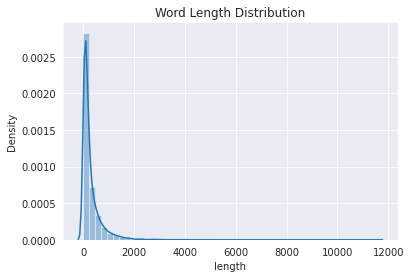

In [20]:
# plot a distribution plot to see the word length distribution
sns.distplot(df_valid["length"], kde=True)
plt.title('Word Length Distribution')
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We can see that there is a high record of the company description having a total word length of around 200 to 300, while those aboce 800 is very rare.
</div>

### 4.3. Populating Nan cells

---

We will now have to populate Nan cells with space so that we can carry on and process with text tokenization.

In [21]:
# fill na with space instead of others
df_valid.fillna(" " ,inplace=True)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593
...,...,...,...,...,...,...,...,...
9593,BANGKOK PATANA SCHOOL,THAILAND,CG,retail n distribution,consumer discretionary distributor,Downstream,"Bangkok Patana School is Thailand’s original British international school for students from 2 to 18 years. Our not-for-profit school has remained at the forefront of education in Thailand and is today one of the most respected educational establishments in South East Asia. We provide learning from Foundation Stage right through to Senior Studies, for over 2,200 students from around 60 countries. The School follows a modified English National curriculum up to Year 11 and the International Baccalaureate in Years 12 and 13. Bangkok Patana School is committed to nurturing lifelong learners who can adapt to an ever-changing world. Our goal is to give your children the best intellectual, physical and social preparation for their futures.",741
9594,INDRATI LINES PTE LTD,SINGAPORE,OOS,others,others,,"Indra is one of the leading global technology and consulting companies and the technological partner for core business operations of its customers world-wide. It is a world-leader in providing proprietary solutions in specific segments in Transport and Defense markets, and a leading firm in Digital Transformation Consultancy and Information Technologies in Spain and Latin America through its affiliate Minsait Its business model is based on a comprehensive range of proprietary products, with a high-v

### 4.4. Assigning tags
---
In this section, we will be assigning tags to every row, so that we can make use of the given keywords for bag-of-words (BoW) processing.

In [22]:
# programmatically assign tags to each definition
sector_keywords = pd.read_excel('./sector_master_definition.xlsx')
df_keywords = sector_keywords[['Sector', 'Subsector', 'Archetype', 'Value Chain', 'Sector Keywords']]

# capitalise all tags
df_keywords['Value Chain'] = df_keywords['Value Chain'].str.upper()
df_keywords.fillna(' ', inplace=True)
df_keywords['Sector Keywords'] = df_keywords['Sector Keywords'].str.upper()
df_keywords['Sector Keywords'].replace(' ', '[]', inplace=True)

# save unique tags, sorted for consistency across runs
sector = np.sort(df_keywords['Sector'].unique())
subsector = np.sort(df_keywords['Subsector'].unique())
archetype = np.sort(df_keywords['Archetype'].unique())
valuechain = np.sort(df_keywords['Value Chain'].unique())

# save counts for use in model
print(len(sector), len(subsector), len(archetype), len(valuechain))
tag_counts = [len(sector), len(subsector), len(archetype), len(valuechain)]

# assign number tag list to each row
taglist = []
for index, row in df_keywords.iterrows():
    temp = []

    temp.append(np.where(sector == row['Sector'])[0][0])
    temp.append(np.where(subsector == row['Subsector'])[0][0])
    temp.append(np.where(archetype == row['Archetype'])[0][0])
    temp.append(np.where(valuechain == row['Value Chain'])[0][0])

    taglist.append(temp)

# assign completed taglist to column in dataframe
df_keywords['list_tag'] = taglist

7 32 92 9


In [23]:
# process data for homogenity
df_valid['Valuechain'] = df_valid['Valuechain'].str.split().str.join(' ')
df_valid['Valuechain'] = df_valid['Valuechain'].str.upper()
df_valid['Sector'] = df_valid['Sector'].str.upper()
df_valid['Valuechain'].replace('', ' ', inplace=True)

taglist_df = []
# process tags for records
for index, row in df_valid.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except:
        # drop data if not valid
        print(row, '\n')
        df_valid.drop(index, inplace=True)


df_valid['list_tag'] = taglist_df

df_valid.shape

Company                        TOP FOUNTAIN LIMITED
Country                                   HONG KONG
Sector                                             
Subsector                                          
Archetype                                          
Valuechain                                         
Company Profile Information                        
length                                             
Name: 1552, dtype: object 

Company                                                                                                                        NASA CONCRETE LIMITED PARTNERSHIP
Country                                                                                                                                                 THAILAND
Sector                                                                                                                                                       CNI
Subsector                                                                

(8423, 9)

In [24]:
# combine all keywords from all sectors
keywords_masterlist = []
for index, row in df_keywords.iterrows():
    keywords_masterlist += eval(row['Sector Keywords'])

# remove extraenous keywords, then sort
keywords_masterlist = sorted(list(set(keywords_masterlist)))
print(len(keywords_masterlist))

1481


### 4.6. Text Tokenization, Removing Stop Words, punctuations, numbers, stop words and Lower Case

---

Now we will start to tokenize the word after we have ensure that the text description between the company descriptions are homogenous. In this process, we will also process with stop words, punctuations, numeric figures, lower cap words and lemmatize words all using the spaCy API.

In [25]:
# we will have to ensure all the dtype of the respective columns are in string and not float for spacy to handle properly, so now we will attempt to convert all into strings
columns_to_convert = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']

for i in columns_to_convert:
    df_valid[i] = df_valid[i].astype(str)

Here we will do everything necessary to start up spacy for use in preprocessing the text.

In [26]:
# import required libraries 
from spacy.language import Language
from spacy.tokens import Doc
from spacy.lang.char_classes import ALPHA, ALPHA_LOWER, ALPHA_UPPER, CONCAT_QUOTES, LIST_ELLIPSES, LIST_ICONS
from spacy.util import compile_infix_regex

# initialise nlp engine
nlp = spacy.load("en_core_web_lg")

# declare custom properties
Doc.set_extension('processed', default=True, force=True)

# modify tokenizer infix patterns
infixes = (
    LIST_ELLIPSES
    + LIST_ICONS
    + [
        r"(?<=[0-9])[+\-\*^](?=[0-9-])",
        r"(?<=[{al}{q}])\.(?=[{au}{q}])".format(
            al=ALPHA_LOWER, au=ALPHA_UPPER, q=CONCAT_QUOTES
        ),
        r"(?<=[{a}]),(?=[{a}])".format(a=ALPHA),
        r"(?<=[{a}0-9])[:<>=/](?=[{a}])".format(a=ALPHA),
    ]
)

infix_re = compile_infix_regex(infixes)
nlp.tokenizer.infix_finditer = infix_re.finditer

# custom retokenizer
@Language.component('custom_retokenizer')
def custom_retoken(doc):
    doc_text = doc.text.upper()
    doc_split = [i.text.upper() for i in doc]
    temp_kw = [i.lstrip().rstrip() for i in keywords_masterlist if len(i.lstrip().rstrip().split(' ')) > 1]
    for token in temp_kw:
        token_length = len(token.split(' '))
        token_split = token.split(' ')
        if token in doc_text and token_split[0] in doc_split:
            merge_pos = doc_split.index(token_split[0])
            with doc.retokenize() as retokenizer:
                try:
                    retokenizer.merge(doc[merge_pos:merge_pos + token_length], attrs={'LEMMA' : token.lower()})
                except:
                    print(merge_pos, merge_pos+token_length)

    return doc

# custom lemmatizer
@Language.component("custom_preprocess")
def custom_preprocess(doc):
    temp = []
    # filter through each token and add to preprocessed text if requirements are met
    for t in doc:
        if (not t.is_punct and not t.like_num and not t.is_stop and not t.is_digit and not (t.ent_type == 396 or t.ent_type == 397)):
            temp.append(t.lemma_.upper())

    doc._.processed = temp

    return doc

# add custom pipeline components to default pipeline
nlp.add_pipe('custom_retokenizer')
nlp.add_pipe('custom_preprocess', last=True)

<function __main__.custom_preprocess>

In [27]:
# run the pipeline on the data
processed_doc = list(nlp.pipe(df_valid['Company Profile Information']))

3 5
95 97
3 5
4 6
6 8


In [28]:
# add lemmatised words to dataframe
df_valid['processed'] = [doc._.processed for doc in processed_doc]

# add tok2vec vectors to dataframe
df_valid['tok2vec_vectors'] = [doc.vector for doc in processed_doc]

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed,tok2vec_vectors
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238,"[6, 18, 49, 5]","[YEAR, EXPERIENCE, CREATE, DEVELOP, HIGH-QUALITY, LEARNING, MATERIAL, ENABLE, PROVIDE, WORLD-CLASS, EDUCATIONAL, INNOVATION, MEET, NEED, TEACHER, STUDENT, INSTITUTION, EDUCATIONAL, AUTHORITY]","[-0.0029705663, 0.1056771, 0.013970748, -0.1120058, 0.07363153, -0.071048886, -0.019222489, 0.061047275, 0.0020444046, 2.3863742, -0.20020126, 0.07672314, 0.05042943, 0.025392044, -0.011852729, -0.02847196, 0.019317739, 1.3682866, -0.27389455, 0.014088167, -0.0029862586, -0.037513837, -0.06255416, -0.04700767, 0.103582054, 0.09771, 0.02803223, 0.083247334, 0.032567345, -0.045013335, 0.024668869, -0.0016745196, 0.023861881, -0.0064663314, 0.12811798, -0.22885214, -0.020730706, 0.07121992, 0.075378284, 0.06615737, 0.06791197, 0.03192744, -0.024669359, -0.09937632, -0.048002817, 0.12493119, -0.048943643, 0.12008095, 0.03635919, -0.10708873, -0.075495034, -0.02761028, 0.0050396104, -0.005189143, 0.006085086, 0.041977905, 0.038532875, 0.009033056, -0.03189669, 0.017125798, -0.0067011616, -0.05045208, -0.08377278, 0.10394438, 0.15093659, -0.0045653093, 0.029679086, 0.21193196, 0.118647374, 0.027956022, 0.002136744, -0.073052615, 0.13854429, -0.0769366, 0.026787503, 0.07002082, 0.17591791, 0.14649183, 0.051970866, 0.2042365, 0.09061214, 0.11980426, -0.080081314, 0.039624058, 0.0011983878, -0.17393745, -0.6240919, 0.2358662, 0.24057283, 0.12939757, -0.14318317, -0.024995027, -0.0043605473, 0.1097792, 0.03966563, -0.03961239, 0.017679673, -0.06452864, -0.014225029, -0.037651498, ...]"
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273,"[6, 8, 20, 3]","[YATAI, MAIN, PRODUCT, COVER, CLEANING, MACHINERY, CLEAN, AGENT, CLEAN, TOOL, STONE, MAINTENANCE, CLEANING, PRODUCT, CLEAN, SOLUTION, SERVICE, INCLUDE, PRODUCT, TECHNICAL, CONSULTATION, PRODUCT, CUSTOMIZATION, EMPLOYEE, TRAINING, MAINTENANCE]","[-0.15241948, 0.21095975, -0.09275485, -0.16138136, -0.014823567, 0.016085902, 0.040125974, -0.21310952, -0.101847045, 1.8460734, -0.16839285, -0.032950826, 0.046391834, -0.0859097, -0.18023936, -0.103850976, 0.05092627, 1.7097157, -0.29955038, 0.12625581, 0.05597487, 0.18340886, -0.074091464, -0.10954478, 0.1556841, 0.00055564765, -0.022111127, -0.012227118, 0.10703608, -0.10581569, 0.15117547, -0.06474909, 0.019971719, 0.1297714, 0.029767118, -0.09600929, 0.027674533, -0.039159935, 0.07369042, -0.018952284, -0.107794, 0.020556318, -0.018955924, -0.024269558, -0.15962683, 0.10172302, -0.122959435, 0.0028336872, 0.12574223, 0.03392581, 0.18180653, -0.093938075, 0.10900337, 0.20526816, -0.18227188, -0.045929708, 0.048952926, -0.11491352, -0.09131242, 0.023215685, 0.16431615, -0.20052531, -0.08381992, 0.16536383, 0.29203144, -0.009875105, 0.029876715, 0.10816347, -0.088352025, -0.023527617, -0.0607822, 0.03707041, 0.077662155, -0.09140042, 0.10423221, 0.07949765, 0.09907111, -0.076503955, 0.14340451, 0.02529484, 0.03784595, 0.11201159, -0.02841272, -0.18528502, -0.055898603, -0.23285827, -0.06545879, 0.60751045, 0.2978246, 0.17540774, 0.14611827, -0.021849057, -0.02368667, 0.003529672, 0.15434404, -0.15489411, 0.13902028, -0.035454873, -0.103131555, -0.1264077, ...]"
2,EXIS TECH SDN. BHD.,MALAYSIA,OOS,others,others,,"In the beginning, it started 

### 4.7. Word Embedding - Document To Vector (Doc2Vec)

---

We will now implement the Doc2Vec word embedding to the data.

In [29]:
# convert words into documents
# tag documents
documents = [TaggedDocument(doc._.processed, [i]) for i, doc in enumerate(processed_doc)]
# display first 10 tagged documents
documents[:10]

[TaggedDocument(words=['YEAR', 'EXPERIENCE', 'CREATE', 'DEVELOP', 'HIGH-QUALITY', 'LEARNING', 'MATERIAL', 'ENABLE', 'PROVIDE', 'WORLD-CLASS', 'EDUCATIONAL', 'INNOVATION', 'MEET', 'NEED', 'TEACHER', 'STUDENT', 'INSTITUTION', 'EDUCATIONAL', 'AUTHORITY'], tags=[0]),
 TaggedDocument(words=['YATAI', 'MAIN', 'PRODUCT', 'COVER', 'CLEANING', 'MACHINERY', 'CLEAN', 'AGENT', 'CLEAN', 'TOOL', 'STONE', 'MAINTENANCE', 'CLEANING', 'PRODUCT', 'CLEAN', 'SOLUTION', 'SERVICE', 'INCLUDE', 'PRODUCT', 'TECHNICAL', 'CONSULTATION', 'PRODUCT', 'CUSTOMIZATION', 'EMPLOYEE', 'TRAINING', 'MAINTENANCE'], tags=[1]),
 TaggedDocument(words=['BEGINNING', 'START', 'PROVIDE', 'TECHNICAL', 'SUPPORT', 'TEST', 'HANDLER', 'MOVE', 'MODULE', 'DESIGN', 'PRODUCTION', 'IN-HOUSE', 'DESIGN', 'FULL-FLEDGED', 'HANDLER', 'INTRODUCE', 'COMPANY', 'DESIGN', 'PRODUCE', 'WIDE', 'RANGE', 'TURRET', 'PICK-AND-PLACE', 'SOLUTION', 'CUSTOMER', 'WORLD'], tags=[2]),
 TaggedDocument(words=['TURNKEY', 'ONE-STOP', 'INTEGRATE', 'SOLUTION', 'PROVIDER',

In [30]:
# generate vectors from documents
d2v_model = Doc2Vec(documents, min_count=1, vector_size=len(keywords_masterlist))
# display vector size
d2v_model.wv.vector_size

1481

In [31]:
# instantiate doc2vec on the the words
df_valid['d2v_vectors'] = [d2v_model.infer_vector(doc._.processed) for doc in processed_doc]
# take a look at the new dataframe
df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed,tok2vec_vectors,d2v_vectors
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238,"[6, 18, 49, 5]","[YEAR, EXPERIENCE, CREATE, DEVELOP, HIGH-QUALITY, LEARNING, MATERIAL, ENABLE, PROVIDE, WORLD-CLASS, EDUCATIONAL, INNOVATION, MEET, NEED, TEACHER, STUDENT, INSTITUTION, EDUCATIONAL, AUTHORITY]","[-0.0029705663, 0.1056771, 0.013970748, -0.1120058, 0.07363153, -0.071048886, -0.019222489, 0.061047275, 0.0020444046, 2.3863742, -0.20020126, 0.07672314, 0.05042943, 0.025392044, -0.011852729, -0.02847196, 0.019317739, 1.3682866, -0.27389455, 0.014088167, -0.0029862586, -0.037513837, -0.06255416, -0.04700767, 0.103582054, 0.09771, 0.02803223, 0.083247334, 0.032567345, -0.045013335, 0.024668869, -0.0016745196, 0.023861881, -0.0064663314, 0.12811798, -0.22885214, -0.020730706, 0.07121992, 0.075378284, 0.06615737, 0.06791197, 0.03192744, -0.024669359, -0.09937632, -0.048002817, 0.12493119, -0.048943643, 0.12008095, 0.03635919, -0.10708873, -0.075495034, -0.02761028, 0.0050396104, -0.005189143, 0.006085086, 0.041977905, 0.038532875, 0.009033056, -0.03189669, 0.017125798, -0.0067011616, -0.05045208, -0.08377278, 0.10394438, 0.15093659, -0.0045653093, 0.029679086, 0.21193196, 0.118647374, 0.027956022, 0.002136744, -0.073052615, 0.13854429, -0.0769366, 0.026787503, 0.07002082, 0.17591791, 0.14649183, 0.051970866, 0.2042365, 0.09061214, 0.11980426, -0.080081314, 0.039624058, 0.0011983878, -0.17393745, -0.6240919, 0.2358662, 0.24057283, 0.12939757, -0.14318317, -0.024995027, -0.0043605473, 0.1097792, 0.03966563, -0.03961239, 0.017679673, -0.06452864, -0.014225029, -0.037651498, ...]","[0.0024957948, 0.013785491, -0.016025377, 0.011838269, 0.0072740596, -0.0031246096, -0.008945194, -0.004188886, -0.009764134, -0.006337024, 0.02462325, 0.002685193, 0.0035353212, -0.013237741, -0.021754477, 0.012720606, 0.009713053, 0.010609191, -0.001144873, -0.009734679, 0.016296206, 0.0109326625, -0.0034403903, -0.0075580846, 0.0012361915, 0.03470507, -0.015323827, 0.00013713748, -0.017428525, -0.018967923, 0.007984226, 0.00017497575, 0.0038334373, -0.0006339875, 0.0009287117, 0.0016807478, 0.010255831, -0.031721253, 0.0026243757, 0.014243102, 0.008503111, -0.009707666, -0.0018263914, 0.01032089, 0.0025472967, -0.012087291, -0.0041130055, -0.017870793, -0.012417821, -0.0013869298, 0.011217529, 0.006465642, -0.010544318, 0.010331546, -3.401649e-05, -0.011235793, 0.0077884137, -0.005057976, 0.0041113505, -0.017106963, 0.0027460754, 0.00624238, 0.007575573, 0.021679306, -0.011429193, 0.024108883, 0.013234655, -0.008510823, 0.0015046588, -0.0020802342, -0.010347307, -0.012306648, -0.007917112, -0.0024661627, -0.02254809, 0.035889503, 0.005362486, 0.00976094, 0.012542625, -0.007934377, -0.006019223, 0.011053242, -0.006776702, 0.01835162, -0.014318572, -0.0054955487, 0.0008620731, 0.0039999518, -0.028334327, 0.0025773484, -0.00610109, 0.014461361, -0.0025310456, -0.011319278, 0.0020309964, -0.020229865, -0.004643658, 0.009865159, -0.017671332, 0.014245397, ...]"
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273,"[6, 8, 20, 3]","[YATAI, MAIN, PRODUCT, COVER, CLEANING, MACHINERY, CLEAN, AGENT, CLEAN, TOOL, STONE, MAINTENANCE, CLEANING, PRODUCT, CLEAN, SOLUTION, SERVICE, INCLUDE, PRODUCT, TECHNICAL, CONSULTATION, PRODUCT, CUSTOMIZATION, EMPLOY

### 4.8. Word Embedding - Word To Vector (Word2Vec)

---

We will now implement the Word2Vec word embedding to the data.

In [32]:
from gensim.models import Word2Vec

# class MySentences(object):
#     """MySentences is a generator to produce a list of tokenized sentences 
    
#     Takes a list of numpy arrays containing documents.
    
#     Args:
#         arrays: List of arrays, where each element in the array contains a document.
#     """
#     def __init__(self, *arrays):
#         self.arrays = arrays
 
#     def __iter__(self):
#         for array in self.arrays:
#             for document in array:
#                 for sent in nltk.sent_tokenize(document):
#                     yield nltk.word_tokenize(sent)

# def get_word2vec(sentences, location):
#     """Returns trained word2vec
    
#     Args:
#         sentences: iterator for sentences
        
#         location (str): Path to save/load word2vec
#     """
#     if os.path.exists(location):
#         print('Found {}'.format(location))
#         model = gensim.models.Word2Vec.load(location)
#         return model
    
#     print('{} not found. training model'.format(location))
#     model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)
#     print('Model done training. Saving to disk')
#     model.save(location)
#     return model

In [33]:
from gensim.models import Word2Vec

corpus = []
for col in df_valid['Company Profile Information']:
    word_list = col.split(" ")
    corpus.append(word_list)
# show first value
corpus[0:1]
# generate vectors from corpus
model = Word2Vec(corpus, min_count=1, vector_size=len(keywords_masterlist))

In [34]:
!pip install nltk
import nltk
nltk.download('punkt')

class MyTokenizer:
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        transformed_X = []
        for document in X:
            tokenized_doc = []
            for sent in nltk.sent_tokenize(document):
                tokenized_doc += nltk.word_tokenize(sent)
            transformed_X.append(np.array(tokenized_doc))
        return np.array(transformed_X)
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.wv.vectors[0])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = MyTokenizer().fit_transform(X)
        
        return np.array([
            np.mean([self.word2vec.wv[w] for w in words if w in self.word2vec.wv]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
mean_embedding_vectorizer = MeanEmbeddingVectorizer(model)
mean_embedded = mean_embedding_vectorizer.fit_transform(df_valid['Company Profile Information'])

In [36]:
df_valid['w2v_vectors'] = list(mean_embedded)
df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed,tok2vec_vectors,d2v_vectors,w2v_vectors
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238,"[6, 18, 49, 5]","[YEAR, EXPERIENCE, CREATE, DEVELOP, HIGH-QUALITY, LEARNING, MATERIAL, ENABLE, PROVIDE, WORLD-CLASS, EDUCATIONAL, INNOVATION, MEET, NEED, TEACHER, STUDENT, INSTITUTION, EDUCATIONAL, AUTHORITY]","[-0.0029705663, 0.1056771, 0.013970748, -0.1120058, 0.07363153, -0.071048886, -0.019222489, 0.061047275, 0.0020444046, 2.3863742, -0.20020126, 0.07672314, 0.05042943, 0.025392044, -0.011852729, -0.02847196, 0.019317739, 1.3682866, -0.27389455, 0.014088167, -0.0029862586, -0.037513837, -0.06255416, -0.04700767, 0.103582054, 0.09771, 0.02803223, 0.083247334, 0.032567345, -0.045013335, 0.024668869, -0.0016745196, 0.023861881, -0.0064663314, 0.12811798, -0.22885214, -0.020730706, 0.07121992, 0.075378284, 0.06615737, 0.06791197, 0.03192744, -0.024669359, -0.09937632, -0.048002817, 0.12493119, -0.048943643, 0.12008095, 0.03635919, -0.10708873, -0.075495034, -0.02761028, 0.0050396104, -0.005189143, 0.006085086, 0.041977905, 0.038532875, 0.009033056, -0.03189669, 0.017125798, -0.0067011616, -0.05045208, -0.08377278, 0.10394438, 0.15093659, -0.0045653093, 0.029679086, 0.21193196, 0.118647374, 0.027956022, 0.002136744, -0.073052615, 0.13854429, -0.0769366, 0.026787503, 0.07002082, 0.17591791, 0.14649183, 0.051970866, 0.2042365, 0.09061214, 0.11980426, -0.080081314, 0.039624058, 0.0011983878, -0.17393745, -0.6240919, 0.2358662, 0.24057283, 0.12939757, -0.14318317, -0.024995027, -0.0043605473, 0.1097792, 0.03966563, -0.03961239, 0.017679673, -0.06452864, -0.014225029, -0.037651498, ...]","[0.0024957948, 0.013785491, -0.016025377, 0.011838269, 0.0072740596, -0.0031246096, -0.008945194, -0.004188886, -0.009764134, -0.006337024, 0.02462325, 0.002685193, 0.0035353212, -0.013237741, -0.021754477, 0.012720606, 0.009713053, 0.010609191, -0.001144873, -0.009734679, 0.016296206, 0.0109326625, -0.0034403903, -0.0075580846, 0.0012361915, 0.03470507, -0.015323827, 0.00013713748, -0.017428525, -0.018967923, 0.007984226, 0.00017497575, 0.0038334373, -0.0006339875, 0.0009287117, 0.0016807478, 0.010255831, -0.031721253, 0.0026243757, 0.014243102, 0.008503111, -0.009707666, -0.0018263914, 0.01032089, 0.0025472967, -0.012087291, -0.0041130055, -0.017870793, -0.012417821, -0.0013869298, 0.011217529, 0.006465642, -0.010544318, 0.010331546, -3.401649e-05, -0.011235793, 0.0077884137, -0.005057976, 0.0041113505, -0.017106963, 0.0027460754, 0.00624238, 0.007575573, 0.021679306, -0.011429193, 0.024108883, 0.013234655, -0.008510823, 0.0015046588, -0.0020802342, -0.010347307, -0.012306648, -0.007917112, -0.0024661627, -0.02254809, 0.035889503, 0.005362486, 0.00976094, 0.012542625, -0.007934377, -0.006019223, 0.011053242, -0.006776702, 0.01835162, -0.014318572, -0.0054955487, 0.0008620731, 0.0039999518, -0.028334327, 0.0025773484, -0.00610109, 0.014461361, -0.0025310456, -0.011319278, 0.0020309964, -0.020229865, -0.004643658, 0.009865159, -0.017671332, 0.014245397, ...]","[-0.048943616449832916, 0.36176469922065735, 0.005232652183622122, 0.11441399157047272, -0.09597410261631012, 0.018463054671883583, -0.12242237478494644, -0.08548738062381744, 0.03940577805042267, -0.018877264112234116, -0.06385243684053421, 0.0761030837893486, -0.02062726765871048, -0.23954203724861145, -0.12043064087629318, 0.03753088787198067, 0.15829212963581085, -0.00895019993185997, -0.13087910413742065, -0.3671529293060303, 0.020399756729602814, 0.01656310446560383, 0.07152775675058365, -0.019429786130785942, 0.3004957437515259, 0.04892755672335625, 0.014226594008505344, -0.07295550405979156, -0.18558317

### 4.9. Word Embedding - Bag Of Words

---

We will now implement the Bag Of Words word embedding to the data.

In [37]:
# do bag of words, normalized
bow_vectors = []
max_count = 1

for index, row in df_valid.iterrows():
    company = row['processed']

    dictionary = dict.fromkeys(keywords_masterlist, 0)
    for word in company:
        if word in keywords_masterlist:
            dictionary[word] += 1
            
    temp_bow_vector = list(dictionary.values())
    if max(temp_bow_vector) > max_count:
        max_count = max(temp_bow_vector)

    # append to dataframe
    bow_vectors.append(temp_bow_vector)

    # print(f'{sum(dictionary.values()):>3}/{len(dictionary.values()):<3} |', dictionary.values())
    
# # normalize all vectors
# for i, vector in enumerate(bow_vectors):
#     bow_vectors[i] = list(np.array(vector) / max_count)
    
df_valid['BoW_vectors'] = bow_vectors

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed,tok2vec_vectors,d2v_vectors,w2v_vectors,BoW_vectors
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238,"[6, 18, 49, 5]","[YEAR, EXPERIENCE, CREATE, DEVELOP, HIGH-QUALITY, LEARNING, MATERIAL, ENABLE, PROVIDE, WORLD-CLASS, EDUCATIONAL, INNOVATION, MEET, NEED, TEACHER, STUDENT, INSTITUTION, EDUCATIONAL, AUTHORITY]","[-0.0029705663, 0.1056771, 0.013970748, -0.1120058, 0.07363153, -0.071048886, -0.019222489, 0.061047275, 0.0020444046, 2.3863742, -0.20020126, 0.07672314, 0.05042943, 0.025392044, -0.011852729, -0.02847196, 0.019317739, 1.3682866, -0.27389455, 0.014088167, -0.0029862586, -0.037513837, -0.06255416, -0.04700767, 0.103582054, 0.09771, 0.02803223, 0.083247334, 0.032567345, -0.045013335, 0.024668869, -0.0016745196, 0.023861881, -0.0064663314, 0.12811798, -0.22885214, -0.020730706, 0.07121992, 0.075378284, 0.06615737, 0.06791197, 0.03192744, -0.024669359, -0.09937632, -0.048002817, 0.12493119, -0.048943643, 0.12008095, 0.03635919, -0.10708873, -0.075495034, -0.02761028, 0.0050396104, -0.005189143, 0.006085086, 0.041977905, 0.038532875, 0.009033056, -0.03189669, 0.017125798, -0.0067011616, -0.05045208, -0.08377278, 0.10394438, 0.15093659, -0.0045653093, 0.029679086, 0.21193196, 0.118647374, 0.027956022, 0.002136744, -0.073052615, 0.13854429, -0.0769366, 0.026787503, 0.07002082, 0.17591791, 0.14649183, 0.051970866, 0.2042365, 0.09061214, 0.11980426, -0.080081314, 0.039624058, 0.0011983878, -0.17393745, -0.6240919, 0.2358662, 0.24057283, 0.12939757, -0.14318317, -0.024995027, -0.0043605473, 0.1097792, 0.03966563, -0.03961239, 0.017679673, -0.06452864, -0.014225029, -0.037651498, ...]","[0.0024957948, 0.013785491, -0.016025377, 0.011838269, 0.0072740596, -0.0031246096, -0.008945194, -0.004188886, -0.009764134, -0.006337024, 0.02462325, 0.002685193, 0.0035353212, -0.013237741, -0.021754477, 0.012720606, 0.009713053, 0.010609191, -0.001144873, -0.009734679, 0.016296206, 0.0109326625, -0.0034403903, -0.0075580846, 0.0012361915, 0.03470507, -0.015323827, 0.00013713748, -0.017428525, -0.018967923, 0.007984226, 0.00017497575, 0.0038334373, -0.0006339875, 0.0009287117, 0.0016807478, 0.010255831, -0.031721253, 0.0026243757, 0.014243102, 0.008503111, -0.009707666, -0.0018263914, 0.01032089, 0.0025472967, -0.012087291, -0.0041130055, -0.017870793, -0.012417821, -0.0013869298, 0.011217529, 0.006465642, -0.010544318, 0.010331546, -3.401649e-05, -0.011235793, 0.0077884137, -0.005057976, 0.0041113505, -0.017106963, 0.0027460754, 0.00624238, 0.007575573, 0.021679306, -0.011429193, 0.024108883, 0.013234655, -0.008510823, 0.0015046588, -0.0020802342, -0.010347307, -0.012306648, -0.007917112, -0.0024661627, -0.02254809, 0.035889503, 0.005362486, 0.00976094, 0.012542625, -0.007934377, -0.006019223, 0.011053242, -0.006776702, 0.01835162, -0.014318572, -0.0054955487, 0.0008620731, 0.0039999518, -0.028334327, 0.0025773484, -0.00610109, 0.014461361, -0.0025310456, -0.011319278, 0.0020309964, -0.020229865, -0.004643658, 0.009865159, -0.017671332, 0.014245397, ...]","[-0.048943616449832916, 0.36176469922065735, 0.005232652183622122, 0.11441399157047272, -0.09597410261631012, 0.018463054671883583, -0.12242237478494644, -0.08548738062381744, 0.03940577805042267, -0.018877264112234116, -0.06385243684053421, 0.0761030837893486, -0.02062726765871048, -0.23954203724861145, -0.12043064087629318, 0.03753088787198067, 0.15829212963581085, -0.00895019993185997, -0.13087910413742065, -0.3671529293060303, 0.020399756729602814, 0.01656310446560383, 0.07152775675058365, -0.019429786130785942, 0.3004957437515259, 0.04892755672335625, 0.014226594008505344, -0.07295550405979156,

In [38]:
# clean up BoW data 
temp = 0
for index, row in df_valid.iterrows():
    if sum(row['BoW_vectors']) <= 0:
        df_valid.drop(index, inplace=True)

df_valid.shape

(7003, 14)

In [39]:
# import validation dataset
df_evaluate = pd.read_excel('./val_dataset.xlsx')
df_evaluate.replace('NAN', np.NaN, inplace=True)

# drop unnecessary columns
df_evaluate.drop(rows_to_drop, axis=1, inplace=True)

# replace newline characters in validation data
df_evaluate = df_evaluate = df_evaluate.replace('\n', ' ', regex=True)

# fill in NAN values in validation data
df_evaluate.fillna(' ', inplace=True)

# change dtype of validation data columns
for i in columns_to_convert:
    df_evaluate[i] = df_evaluate[i].astype(str)

# process validation dataset
df_evaluate['Valuechain'] = df_evaluate['Valuechain'].str.split().str.join(' ')
df_evaluate['Valuechain'] = df_evaluate['Valuechain'].str.upper()
df_evaluate['Sector'] = df_evaluate['Sector'].str.upper()
df_evaluate['Valuechain'].replace('', ' ', inplace=True)

# add tags to validation data
taglist_df = []
# process tags for records
for index, row in df_evaluate.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except Exception as e:
        # drop data if not valid
        print(row.name, e, '\n')
        df_evaluate.drop(index, inplace=True)

df_evaluate['list_tag'] = taglist_df

# run spacy on validation data
evaluate_doc = list(nlp.pipe(df_evaluate['Company Profile Information']))

# add spacy processed words and vectors to validation dataframe
df_evaluate['processed'] = [doc._.processed for doc in evaluate_doc]
df_evaluate['tok2vec_vectors'] = [doc.vector for doc in evaluate_doc]

# do doc2vec for validation data
# convert words into documents (tag documents)
documents = [TaggedDocument(doc._.processed, [i]) for i, doc in enumerate(evaluate_doc)]

# generate vectors from documents
d2v_model = Doc2Vec(documents, min_count=1, vector_size=len(keywords_masterlist))

# instantiate doc2vec on the the words
df_evaluate['d2v_vectors'] = [d2v_model.infer_vector(doc._.processed) for doc in evaluate_doc]

# do word2vec for validation data
corpus = []
for col in df_evaluate['Company Profile Information']:
    word_list = col.split(" ")
    corpus.append(word_list)
# show first value
corpus[0:1]
# generate vectors from corpus
model = Word2Vec(corpus, min_count=1, vector_size=len(keywords_masterlist))

mean_embedding_vectorizer = MeanEmbeddingVectorizer(model)
mean_embedded = mean_embedding_vectorizer.fit_transform(df_evaluate['Company Profile Information'])

df_evaluate['w2v_vectors'] = list(mean_embedded)

# do bag of words for validation data
bow_vectors = []

for index, row in df_evaluate.iterrows():
    company = row['processed']

    dictionary = dict.fromkeys(keywords_masterlist, 0)
    for word in company:
        if word in keywords_masterlist:
            dictionary[word] += 1
            
    temp_bow_vector = list(dictionary.values())
    if max(temp_bow_vector) > max_count:
        max_count = max(temp_bow_vector)

    # append to dataframe
    bow_vectors.append(temp_bow_vector)
    
df_evaluate['BoW_vectors'] = bow_vectors

df_evaluate.head(3)

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,list_tag,processed,tok2vec_vectors,d2v_vectors,w2v_vectors,BoW_vectors
0,"BANGKOK ROLLER CO., LTD.",THAILAND,OOS,others,others,,"Bangkok Roller Co., Ltd. is the leading manufacturer and supplier of supplier rolls in Thailand. For over 20 years, we have been trusted by local and overseas customer. Our Rubber roll products have been major role in many manufacturing industries such as paper, steel sheets, textiles, plastic, films, printing, packaging product, and many more. Furthermore, our reputable rubber roll products have been parted in reducing the import of high priced rubber rolls from overseas.","[4, 24, 64, 0]","[BANGKOK, ROLLER, CO., LTD., LEAD, MANUFACTURER, SUPPLIER, SUPPLIER, ROLL, THAILAND, YEAR, TRUST, LOCAL, OVERSEAS, CUSTOMER, RUBBER, ROLL, PRODUCT, MAJOR, ROLE, MANUFACTURING, INDUSTRY, PAPER, STEEL SHEET, TEXTILE, PLASTIC, FILM, PRINTING, PACKAGING, PRODUCT, FURTHERMORE, REPUTABLE, RUBBER, ROLL, PRODUCT, PART, REDUCE, IMPORT, HIGH, PRICE, RUBBER, ROLL, OVERSEAS]","[-0.057685155, 0.2115785, -0.03147221, -0.17814417, 0.17538649, 0.033983827, -0.027668668, -0.123965755, -0.13181639, 1.8551306, -0.15736748, 0.029855158, 0.11265339, -0.12504563, -0.07674297, -0.09440538, 0.06139562, 1.363419, -0.15326539, 0.1340252, -0.0548392, 0.0738244, -0.061550513, 0.0480595, -0.012247533, 0.013309164, -0.10519558, -0.039817132, 0.014221066, -0.06978026, 0.10308826, 0.06357016, -0.10603121, 0.08457979, 0.109081924, -0.05192251, 0.017023744, -0.012120642, 0.08584156, -0.034634266, 0.034561504, 0.06996525, 0.050695244, -0.1330373, -0.08694513, 0.021933405, -0.098533764, -0.074474804, 0.12024665, -0.0032658437, 0.07436689, -0.02922597, -0.031138541, -0.022591816, -0.018413717, -0.050598897, 0.03546367, -0.12065057, 0.01569407, -0.10735568, 0.010489935, -0.15073073, -0.023945471, 0.18958172, 0.082140855, -0.036684696, 0.06182886, 0.1380921, -0.01568787, 0.07268921, -0.023091733, 0.06991887, 0.07371062, 0.041415166, 0.09193657, 0.07495456, 0.07190542, 0.017786883, 0.07984453, 0.10675104, 0.042225588, 0.10768829, -0.11892822, -0.088016905, -0.030261122, -0.3123877, -0.053889986, 0.39034998, 0.19110213, 0.11286529, 0.011368535, -0.048200734, -0.017039156, 0.048219636, 0.12122308, -0.06950426, 0.0780463, -0.07006476, -0.12418257, -0.038933977, ...]","[0.013114301, 0.030058477, 0.0029060012, -0.010475649, -0.004222088, 0.012919073, -0.027067376, -0.013289502, 0.012203725, -0.01365136, 0.0052830568, -0.008041425, -0.001419736, -0.0063692746, -0.01415649, 0.0041888114, 0.005588718, 0.004361393, -0.006034406, -0.013262705, 0.008142886, 0.011759161, -0.0016606564, -0.0063548326, 0.012199553, 0.03532411, -0.006560675, -0.017210616, -0.008609542, 0.010289006, 0.0017081068, 0.008521292, 0.004501681, -0.010626044, 0.00836693, 0.003394646, 0.004615072, -0.0023430814, 0.035318185, 0.0051206606, 0.029116327, 0.0006267067, -0.00979981, 0.007873465, -0.005137321, 0.008841597, 0.007475674, -0.014596693, -0.02190555, 0.0008262775, 0.021556338, 0.020726018, -0.021101968, -0.015078769, 0.004044558, 0.00039954952, 0.018531447, -0.008108642, -0.0047247857, 0.026274374, -0.0038532682, 0.005345115, 0.038898293, 0.008063159, -0.0031659927, 0.022779372, 0.007013573, -0.007176001, -0.011279914, 0.021019952, -0.0065175, 0.029601287, -0.01659497, -0.012503873, -0.04304729, 0.0022699696, -0.022156194, 0.00014380031, 0.023512023, -0.020179149, -0.01803393, -0.0023493846, -0.034467634, 0.0072874585, -0.011336378, 0.0059996676, 0.027045118, 0.0037953604, 0.005808662, 0.005499825, 0.0085453475, 0.011845527, -0.002281105, 0.015488315, -0.027839245, -0.012720053, -0.013694882, 0.021547776, 0.012365464, 0.02848206, ...]","[0.06586253643035889, 0.14053110778331757, -0.014784484170377254, 0.021817784756422043, -0.0509626567363739, -0.006945440080016851, -0.06503775715827942, 0.004136295523494482, 0.0007539246580563486, 0.003380319569259882, 0.013041197322309017, -0.005824257619678974, -0.0221

# 5.Models
---
Here we will train the model that will help categorize each company.

### 5.1. Training Models

In [40]:
import tensorflow.keras as Keras

print('--- Version Checking ---')
print("Keras:", Keras.__version__)

--- Version Checking ---
Keras: 2.5.0


In [41]:
X_train = [np.array(list(df_valid['w2v_vectors'])), np.array(list(df_valid['tok2vec_vectors']))]
y_train = np.array(list(df_valid['list_tag']))

X_test = [np.array(list(df_evaluate['w2v_vectors'])), np.array(list(df_evaluate['tok2vec_vectors']))]
y_test = np.array(list(df_evaluate['list_tag']))

# X_train = [np.array(list(df_valid['d2v_vectors'])), np.array(list(df_valid['tok2vec_vectors']))]
# y_train = np.array(list(df_valid['list_tag']))

# X_test = [np.array(list(df_evaluate['d2v_vectors'])), np.array(list(df_evaluate['tok2vec_vectors']))]
# y_test = np.array(list(df_evaluate['list_tag']))

In [42]:
# create multi-output model
from tensorflow.keras.layers import Dense, Input, Dropout, Concatenate
from tensorflow.keras import Model

# function to build model branches
def multi_branch(x, name, input_dim, output_dim, dropout_rate):
    x = Dense(input_dim // 2, activation='selu')(x)
    x = Dropout(dropout_rate)(x)

    if name == 'sector' or name == 'subsector' or name == 'archetype':
        x = Dense(input_dim // 3, activation='selu')(x)
        x = Dropout(dropout_rate)(x)

    x = Dense(input_dim // 4, activation='tanh')(x)
    x = Dropout(dropout_rate)(x)

    if name == 'sector' or name == 'subsector' or name == 'archetype':
        x = Dense(input_dim // 4, activation='tanh')(x)
        x = Dropout(dropout_rate)(x)
    
    x = Dense(input_dim // 8, activation='swish')(x)

    # output
    output = Dense(output_dim, name=name, activation='softmax')(x)

    return output

def create_multilabel(labels, labels_output_dim, d2v_dim, t2v_dim, dropout_rate=0.3):
    # check labels
    assert len(labels) == len(labels_output_dim)

    input_layer_1 = Input(d2v_dim)
    input_layer_2 = Input(t2v_dim)

    # group 1 dense layers
    group_1 = Dense(int(d2v_dim), activation='tanh')(input_layer_1)
    group_1 = Dense(d2v_dim // 1.5, activation='tanh')(group_1)

    # group 2 dense layers
    group_2 = Dense(t2v_dim, activation='tanh')(input_layer_2)
    group_2 = Dense(t2v_dim // 1.5, activation='tanh')(group_2)

    # concatenate layers
    merge_layer = Concatenate()([group_1, group_2])
    merge_layer = Dense((d2v_dim // 1.5) + (t2v_dim // 1.5), activation='swish')(merge_layer)
    merge_layer = Dropout(dropout_rate)(merge_layer)
    merge_layer = Dense((d2v_dim // 2) + (t2v_dim // 1.5), activation='swish')(merge_layer)
    merge_layer = Dropout(dropout_rate)(merge_layer)

    # multilabel branches
    branches = []
    for i in range(len(labels)):
        branches.append(multi_branch(merge_layer, labels[i], d2v_dim, labels_output_dim[i], dropout_rate))

    # put model together
    model = Model(inputs=[input_layer_1, input_layer_2], outputs=branches, name='company_classification_model')

    return model

# one hot 
def one_hot(arr, n_cat):
    output = []
    for n in arr:
        result = np.zeros(n_cat)
        result[n] = 1

        output.append(result)

    return np.array(output, dtype=int)

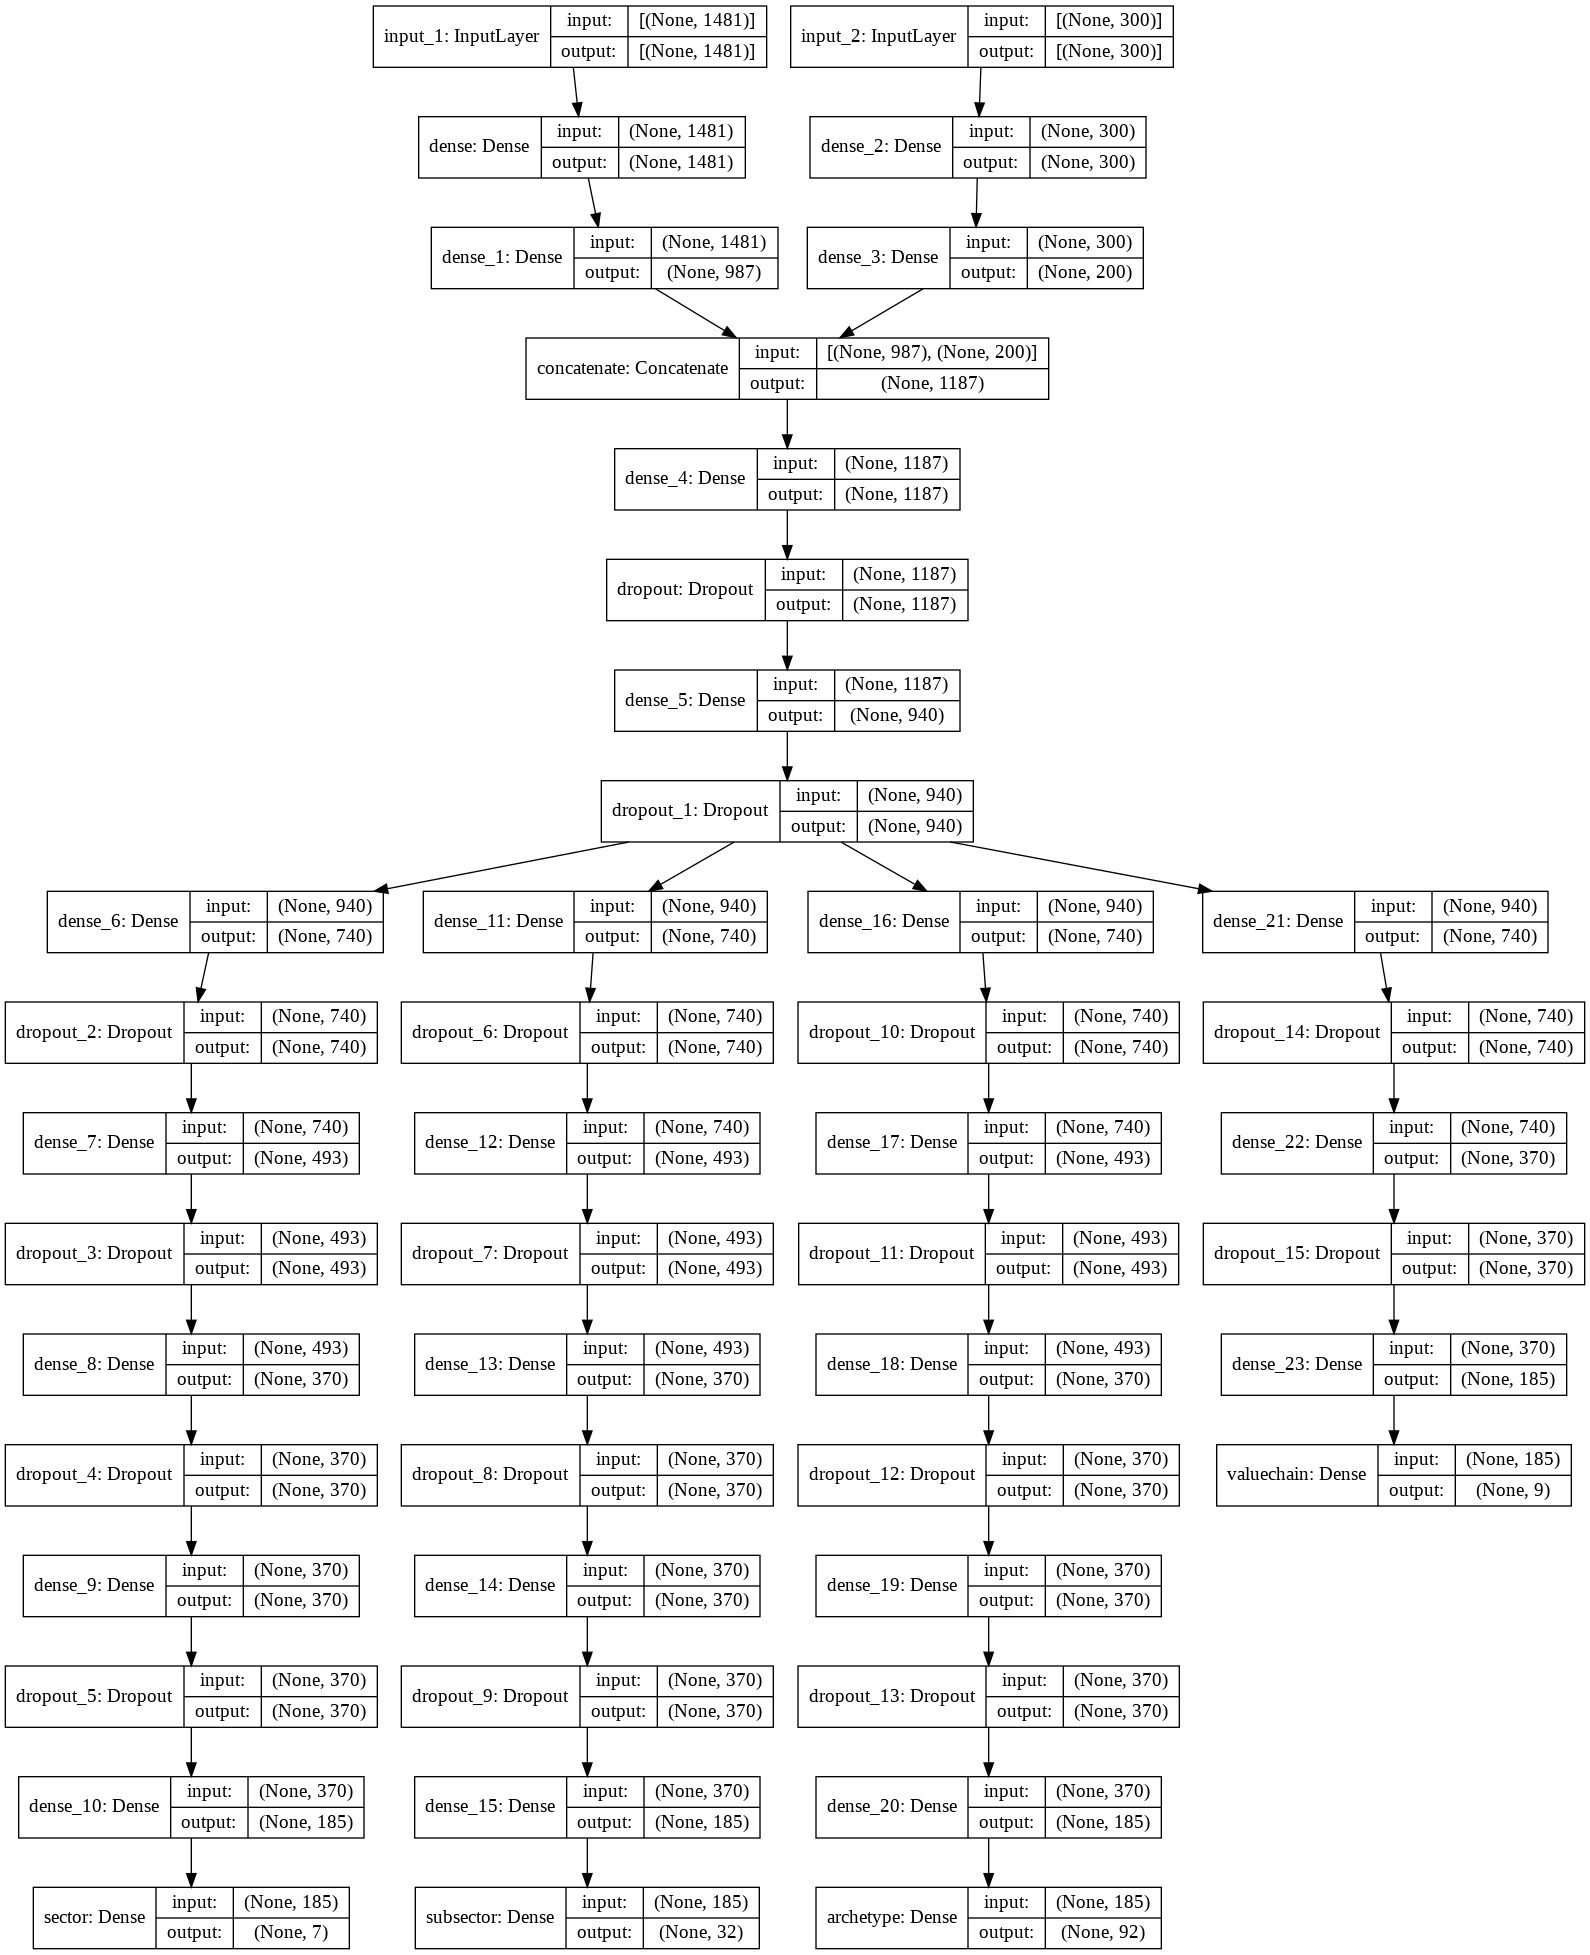

In [43]:
# take a look at the architecture
label_names = ['sector', 'subsector', 'archetype', 'valuechain']

model = create_multilabel(label_names, tag_counts, len(keywords_masterlist), 300)

tf.keras.utils.plot_model(model, show_shapes=True)

In [44]:
# preprocess labels before training
y_train_multi = {label_names[i] : one_hot(y_train[:, i], tag_counts[i]) for i in range(4)}
y_test_multi = {label_names[i] : one_hot(y_test[:, i], tag_counts[i]) for i in range(4)}

losses = {i : 'categorical_crossentropy' for i in label_names}

In [45]:
# import metrics
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.optimizers import SGD
from timeit import default_timer as timer

start = timer()
model.compile(optimizer=SGD(nesterov=True), loss=losses, metrics=['accuracy', Precision(), Recall(), AUC(name='auc_precision_recall', num_thresholds=10000)])
history = model.fit(X_train, y_train_multi, epochs=100, batch_size=20)
end = timer() 
print("Total time taken for execution: ", end-start, "s")

Epoch 1/100
351/351 [==============================] - 15s 24ms/step - loss: 10.2051 - sector_loss: 1.8347 - subsector_loss: 2.9778 - archetype_loss: 3.7162 - valuechain_loss: 1.6763 - sector_accuracy: 0.2709 - sector_precision: 0.5102 - sector_recall: 0.0036 - sector_auc_precision_recall: 0.6545 - subsector_accuracy: 0.2210 - subsector_precision: 0.3333 - subsector_recall: 0.0013 - subsector_auc_precision_recall: 0.7594 - archetype_accuracy: 0.2175 - archetype_precision: 0.3108 - archetype_recall: 0.0033 - archetype_auc_precision_recall: 0.7929 - valuechain_accuracy: 0.3514 - valuechain_precision: 0.5692 - valuechain_recall: 0.0159 - valuechain_auc_precision_recall: 0.8085
Epoch 2/100
351/351 [==============================] - 8s 24ms/step - loss: 9.1502 - sector_loss: 1.5254 - subsector_loss: 2.6850 - archetype_loss: 3.4015 - valuechain_loss: 1.5384 - sector_accuracy: 0.4100 - sector_precision: 0.7530 - sector_recall: 0.1502 - sector_auc_precision_recall: 0.7884 - subsector_accuracy:

### 5.2 Evaluating Models

In [46]:
metrics = model.evaluate(X_test, y_test_multi, verbose=0)[1:]

print(f'Label\t\tLoss\tAccuracy\tPrecision\tRecall\tPR AUC\tF1 Score')
for i, label in enumerate(label_names):
    print(f'{label:<16}{metrics[i]:<8.3f}{metrics[i+4]:<8.3%}\t{metrics[i+8]:<9.3f}\t{metrics[i+12]:<6.3f}\t{metrics[i+16]:<6.3f}\t{(metrics[i+8] * metrics[i+12]) / (metrics[i+8] + metrics[i+12]):<8.3f}')

Label		Loss	Accuracy	Precision	Recall	PR AUC	F1 Score
sector          0.767   74.357% 	0.630    	0.499 	0.643 	0.279   
subsector       1.249   78.762% 	0.709    	0.616 	0.703 	0.330   
archetype       1.782   71.786% 	0.549    	0.408 	0.584 	0.234   
valuechain      0.926   95.681% 	0.973    	0.976 	0.949 	0.487   


In [47]:
# import libs
import seaborn as sns

# custom metric analysis
y_test_multi = [one_hot(np.array(list(df_evaluate['list_tag']))[:, i], tag_counts[i]) for i in range(4)]
y_actual = np.array(df_evaluate['list_tag'].to_list())

# obtain predictions
y_pred = model.predict(X_test)

# process predictions
processed = []
for label in y_pred:
    temp = []
    # turn all softmax preds to numbers
    for row in label:
        temp.append(np.argmax(row))
    
    processed.append(np.array(temp))

# convert processed preds to correct format
y_pred = np.array(processed).T

# do analysis
# format: [correctly predicted, sec and sub predicted correctly, false negative, false positive]
sector_metrics = {i : [0, 0, 0, 0] for i in range(tag_counts[0])}
subsector_metrics = {i : [0, 0, 0, 0] for i in range(tag_counts[1])}
for i, row in enumerate(y_pred):   
    flag = 0
    # check sector
    if row[0] == y_actual[i][0]:
        sector_metrics[row[0]][0] += 1
        flag += 1
    else:
        sector_metrics[row[0]][3] += 1
        sector_metrics[y_actual[i][0]][2] += 1
        
    # check subsector
    if row[1] == y_actual[i][1]:
        subsector_metrics[row[1]][0] += 1
        flag += 1
    else:
        subsector_metrics[row[1]][3] += 1
        subsector_metrics[y_actual[i][1]][2] += 1
        
    if flag == 2:
        sector_metrics[row[0]][1] += 1
        subsector_metrics[row[1]][1] += 1
        
# print out stats
print(f'Label\t\t\t\t\tAccuracy\tCorrect Rows\t% Correct Rows\tPrecision\tRecall')
for sec_label, sec_metrics in sector_metrics.items():
    # generate list of subsectors under a sector
    sub_unique, sub_counts = np.unique(y_actual[y_actual[:, 0] == sec_label][:, 1], return_counts=True)
    sec_subsector = dict(zip(sub_unique, sub_counts))
        
    # print sector stats
    print('-'*110)
    print(f'{sector[sec_label]:<40.39}{sec_metrics[0] / 200:<16.1%}{sec_metrics[1]:<16}{sec_metrics[1] / 200:<16.1%}{sec_metrics[0] / (sec_metrics[0] + sec_metrics[3]):<16.3f}{sec_metrics[0] / (sec_metrics[0] + sec_metrics[2]):<6.3f}')
    
    for sub_label, sub_count in sec_subsector.items():
        sub_metrics = subsector_metrics[sub_label]
        
        # catch divide-by-zero errors
        try:
            sub_acc = sub_metrics[0] / sub_count
            sub_corr = sub_metrics[1] / 200
            sub_pre = sub_metrics[0] / (sub_metrics[0] + sub_metrics[3])
            sub_rec = sub_metrics[0] / (sub_metrics[0] + sub_metrics[2])
        except ZeroDivisionError:
            sub_pre = sub_rec = sub_corr = sub_acc = 0
            
        
        print(f'> {subsector[sub_label]:<38.37}{sub_acc:<16.2%}{sub_metrics[1]:<16}{sub_corr:<16.1%}{sub_pre:<16.3f}{sub_rec:<6.3f}')

Label					Accuracy	Correct Rows	% Correct Rows	Precision	Recall
--------------------------------------------------------------------------------------------------------------
CG                                      61.5%           98              49.0%           0.715           0.615 
> agribusiness                          88.89%          8               4.0%            0.727           0.889 
> animal protein                        78.95%          15              7.5%            0.484           0.789 
> fmcg                                  36.84%          14              7.0%            0.824           0.368 
> retail n distribution                 56.72%          61              30.5%           0.603           0.567 
--------------------------------------------------------------------------------------------------------------
CNI                                     90.0%           136             68.0%           0.614           0.900 
> building_material                     83.70%  

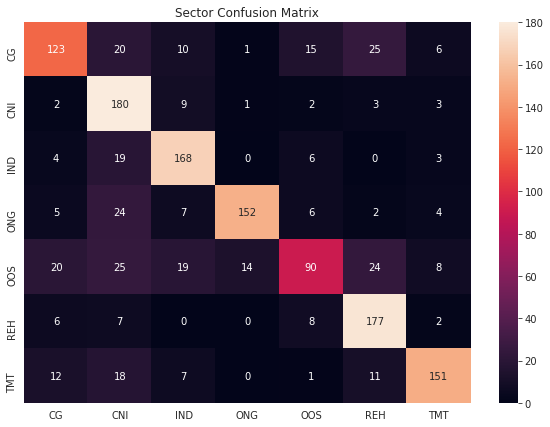

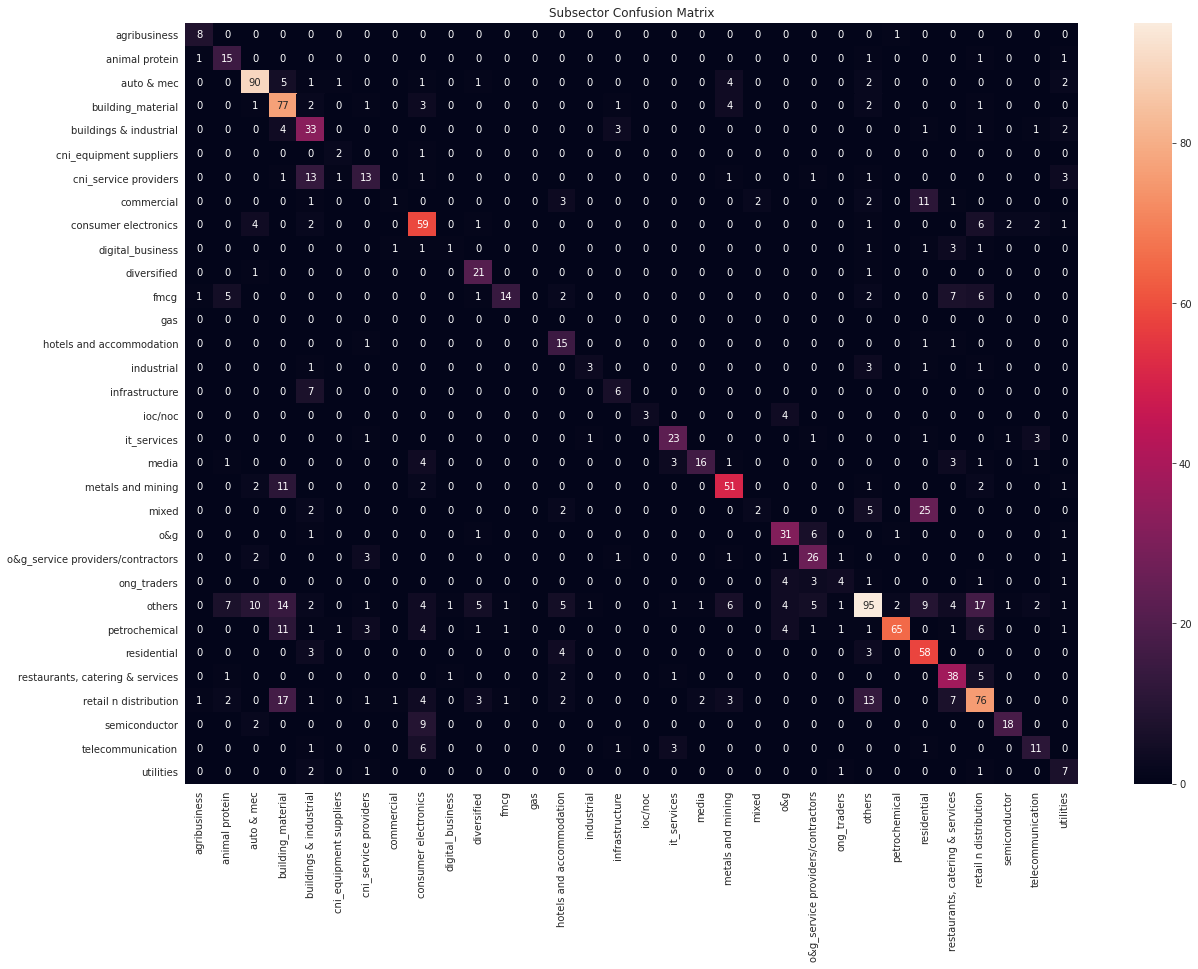

In [48]:
# sector confusion matrix
df_sector_cm = pd.DataFrame(tf.math.confusion_matrix(y_actual[:, 0], y_pred[:, 0]).numpy(), index=sector, columns=sector)

plt.figure(1, figsize=(10, 7))
plt.title('Sector Confusion Matrix')
sns.heatmap(df_sector_cm, annot=True, fmt='d')

# subsector confusion matrix
df_subsector_cm = pd.DataFrame(tf.math.confusion_matrix(y_actual[:, 1], y_pred[:, 1]).numpy(), index=subsector, columns=subsector)

plt.figure(2, figsize=(20, 14))
plt.title('Subsector Confusion Matrix')
sns.heatmap(df_subsector_cm, annot=True, fmt='d')

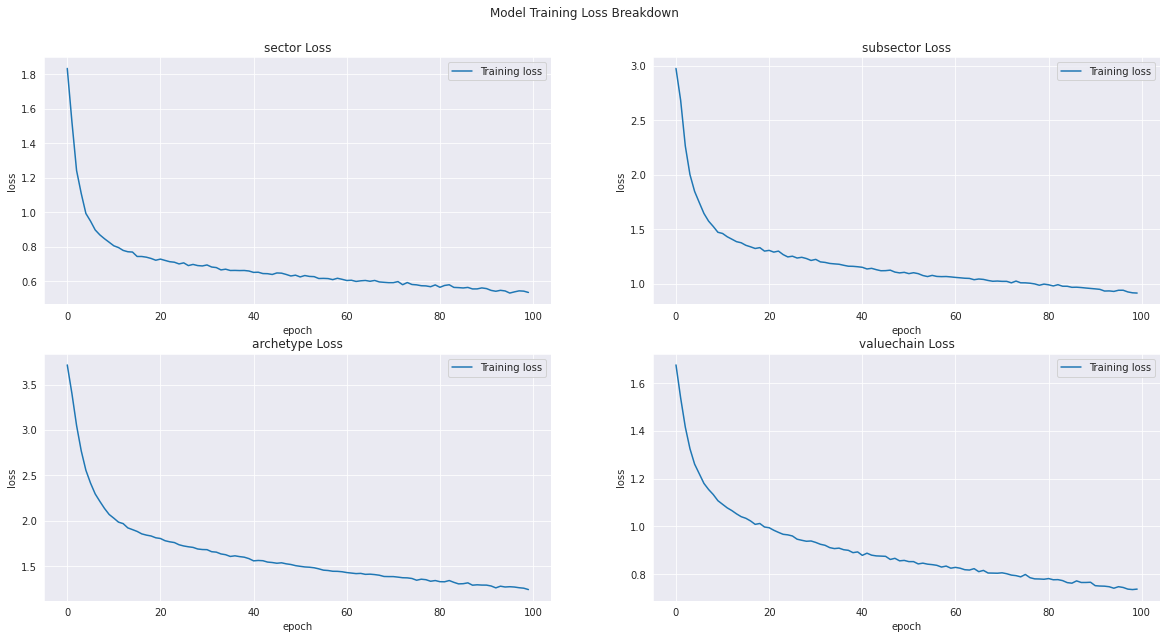

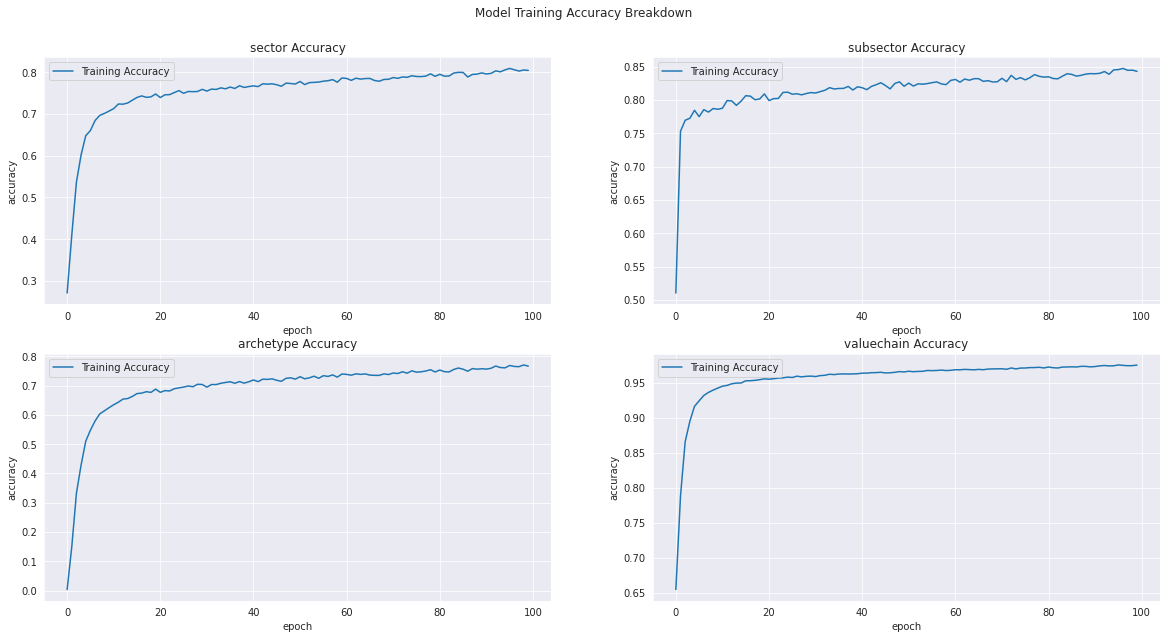

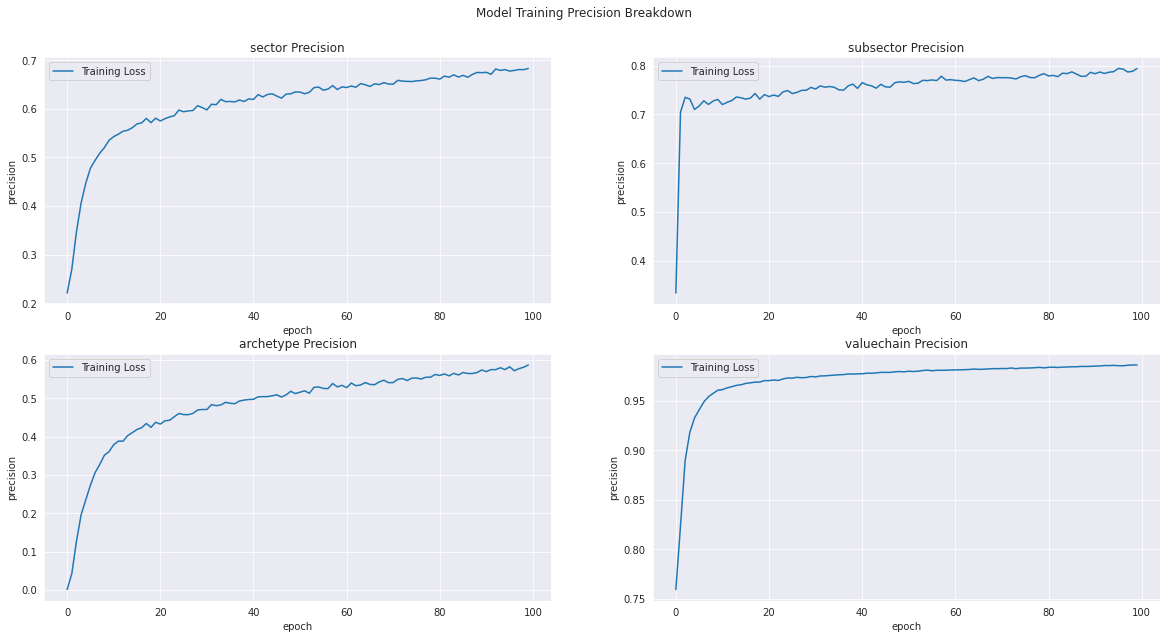

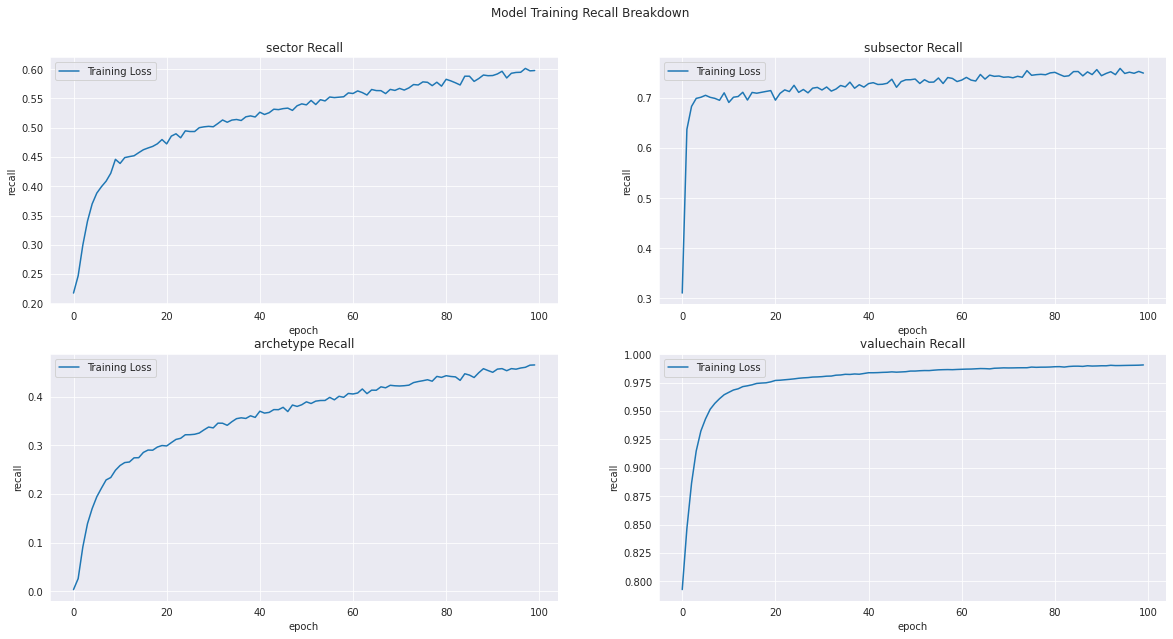

In [49]:
# plot metric graphs for all labels
metric_names = model.metrics_names

fig = plt.figure(1, figsize=(20,10))
plt.suptitle('Model Training Loss Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+1]])
    plt.title(f'{name} Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss'])

fig = plt.figure(2, figsize=(20,10))
plt.suptitle('Model Training Accuracy Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+5]])
    plt.title(f'{name} Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training Accuracy'])

fig = plt.figure(3, figsize=(20,10))
plt.suptitle('Model Training Precision Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+9]])
    plt.title(f'{name} Precision')
    plt.ylabel('precision')
    plt.xlabel('epoch')
    plt.legend(['Training Loss'])

fig = plt.figure(4, figsize=(20,10))
plt.suptitle('Model Training Recall Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+13]])
    plt.title(f'{name} Recall')
    plt.ylabel('recall')
    plt.xlabel('epoch')
    plt.legend(['Training Loss'])

plt.show()

### 5.3. Saving Models

In [ ]:
# save models to file
model.save('./multilabel_model')
d2v_model.save('./doc2vec_model')
w2v_model.save('./word2vec_model')

In [ ]:
!zip -r multilabel_model.zip ./multilabel_model
!rm -rf ./multilabel_model

---
---
---

# 6.References


## Linking GitHub Private Repo with Google Colab
---
1. [How to clone private Github repo from Google Colab using SSH](https://medium.com/@purba0101/how-to-clone-private-github-repo-in-google-colab-using-ssh-77384cfef18f)
2. [Adding a new SSH key to your GitHub account](https://docs.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account)


## How to classify text with NLTK
---
1. [Learning to Classify Text](https://www.nltk.org/book/ch06.html)


## Other references
---
1. [Print very long string completely in pandas dataframe](https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
2. [Removing newlines from messy strings in pandas dataframe cells?
](https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells)
3. [Tokenizing using Pandas and spaCy](https://stackoverflow.com/questions/46981137/tokenizing-using-pandas-and-spacy)
4. [Intro to NLP with spaCy](https://nicschrading.com/project/Intro-to-NLP-with-spaCy/)
5. [A short introduction to NLP in Python with spaCy](https://towardsdatascience.com/a-short-introduction-to-nlp-in-python-with-spacy-d0aa819af3ad)
6. [Punctuation, stopwords and lemmatization with spacy](https://stackoverflow.com/questions/57747613/punctuation-stopwords-and-lemmatization-with-spacy)

